In [123]:
!pwd

/home/astro/iraf/ISIS_Marzo-20_NGC/package/isis_tools


In [142]:
import pandas as pd
import numpy as np

### nombres

In [143]:
DATA_DIR = 'NGC_5634V'

header_file = f'{DATA_DIR}/header_info_images4'
data_file = f'{DATA_DIR}/lc52.data'
otuput_name = 'processed_lc52_HJD.data'

### archivos 

In [144]:
# cargamos archivos
header_info = pd.read_csv(header_file, delim_whitespace=True, 
                         names=['file', 'JD', 'HJD', 'UT', 'EXPTIME', 'FILTER'])

lc_data = pd.read_csv(data_file, delim_whitespace=True,
                     names=['JD', 'Flux', 'errFlux', 'refFlux', 'errRefF', 'calSNR'])

# JD - 2460400
header_info['JD'] = header_info['JD'] - 2460400
header_info['HJD'] = header_info['HJD'] - 2460400  # Si también quieres ajustar HJD

/tmp/ipykernel_9755/684921361.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  header_info = pd.read_csv(header_file, delim_whitespace=True,
/tmp/ipykernel_9755/684921361.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc_data = pd.read_csv(data_file, delim_whitespace=True,


In [145]:
header_info.head()

,file,JD,HJD,UT,EXPTIME,FILTER
0,202405010178o.fits,31.831055,31.836794,07:55:43.186945,120.0,V
1,202405010180o.fits,31.833791,31.839529,07:59:39.501064,120.0,V
2,202405010182o.fits,31.836491,31.842230,08:03:32.862361,120.0,V
3,202405010184o.fits,31.839226,31.844964,08:07:29.114749,120.0,V
4,202405010186o.fits,31.841925,31.847663,08:11:22.343940,120.0,V


In [146]:
lc_data.head()

,JD,Flux,errFlux,refFlux,errRefF,calSNR
0,31.831055,-2781.7134,207.0539,-2758.7772,228.5742,0.7966
1,31.833791,-2627.1430,205.5263,-2635.7390,227.1235,0.8796
2,31.836491,-2469.8416,207.8666,-2495.9483,222.2319,0.8208
3,31.839226,-2214.1338,207.2856,-2209.2018,226.6226,0.8165
4,31.841925,-2434.7003,208.2351,-2170.0728,227.2063,0.8127


### offset

In [147]:
# calculamos el offset necesario para quitarnos negativos
offset_obj = abs(lc_data['Flux'].min()) + 10
offset_ref = abs(lc_data['refFlux'].min()) + 10

# el maximo de los dos
offset = max(offset_obj, offset_ref)
print(offset)

23961.5746


In [148]:
# aplicamos el offset 
lc_data['Flux'] = lc_data['Flux'] + offset
lc_data['refFlux'] = lc_data['refFlux'] + offset

In [149]:
# comprobamos 
print(lc_data['Flux'].min())
print(lc_data['refFlux'].min())

458.6054000000004
10.0


### Magnitud

In [150]:
# Flux a magnitud instrumental
exptime = 120 # la sacamos del header_info_images4

lc_data['MagInstr'] = 25.0 - 2.5*np.log10(lc_data['Flux']) + 2.5*np.log10(exptime)

In [151]:
header_info.head()

,file,JD,HJD,UT,EXPTIME,FILTER
0,202405010178o.fits,31.831055,31.836794,07:55:43.186945,120.0,V
1,202405010180o.fits,31.833791,31.839529,07:59:39.501064,120.0,V
2,202405010182o.fits,31.836491,31.842230,08:03:32.862361,120.0,V
3,202405010184o.fits,31.839226,31.844964,08:07:29.114749,120.0,V
4,202405010186o.fits,31.841925,31.847663,08:11:22.343940,120.0,V


In [152]:
lc_data.head()

,JD,Flux,errFlux,refFlux,errRefF,calSNR,MagInstr
0,31.831055,21179.8612,207.0539,21202.7974,228.5742,0.7966,19.383145
1,31.833791,21334.4316,205.5263,21325.8356,227.1235,0.8796,19.375250
2,31.836491,21491.7330,207.8666,21465.6263,222.2319,0.8208,19.367275
3,31.839226,21747.4408,207.2856,21752.3728,226.6226,0.8165,19.354433
4,31.841925,21526.8743,208.2351,21791.5018,227.2063,0.8127,19.365501


### sort ??

In [153]:
header_info.sort_values(by='JD')

,file,JD,HJD,UT,EXPTIME,FILTER
37,202405011232o.fits,31.762680,31.768419,06:17:15.545731,120.0,V
38,202405011234o.fits,31.765414,31.771153,06:21:11.801216,120.0,V
39,202405011236o.fits,31.768152,31.773891,06:25:08.36365,120.0,V
40,202405011238o.fits,31.770843,31.776582,06:29:00.855858,120.0,V
41,202405011240o.fits,31.773552,31.779290,06:32:54.88532,120.0,V
...,...,...,...,...,...,...
456,202405110301o.fits,41.973402,41.978999,11:20:41.905776,120.0,V
457,202405110303o.fits,41.976164,41.981761,11:24:40.577258,120.0,V
458,202405110305o.fits,41.978922,41.984519,11:28:38.832647,120.0,V
459,202405110307o.fits,41.981684,41.987281,11:32:37.514056,120.0,V


In [154]:
lc_data.sort_values(by='JD')

,JD,Flux,errFlux,refFlux,errRefF,calSNR,MagInstr
37,31.762680,13280.1727,243.4784,13448.1163,267.0950,0.9901,19.889944
38,31.765414,13727.3896,253.1390,13740.6848,268.2203,0.9915,19.853983
39,31.768152,14553.4893,247.0593,14626.8262,266.0457,0.9872,19.790535
40,31.770843,14302.2399,247.1488,14293.9804,267.1501,0.9906,19.809443
41,31.773552,14684.7800,250.2263,14837.2754,267.3565,0.9860,19.780785
...,...,...,...,...,...,...,...
456,41.973402,14442.5250,274.5072,14291.3893,279.8644,0.9663,19.798845
457,41.976164,14502.6404,268.7793,14311.8555,274.7488,0.9614,19.794335
458,41.978922,15046.6171,274.1297,14895.8458,278.9333,0.9607,19.754356
459,41.981684,15087.3051,296.4939,14965.6751,299.6367,0.9713,19.751424


# merge

In [155]:
merged_df = pd.merge_asof(
    lc_data.sort_values(by='JD'),                # DataFrame base
    header_info.sort_values(by='JD'),            # DataFrame a unir
    on='JD',               # columna clave
    direction='nearest',   # unir con el HJD más cercano
    tolerance=0.0005       # tolerancia opcional para evitar errores si hay diferencias grandes
)

merged_df = merged_df.drop(['refFlux', 'errFlux', 'errRefF'], axis=1)

In [156]:
merged_df

,JD,Flux,calSNR,MagInstr,file,HJD,UT,EXPTIME,FILTER
0,31.762680,13280.1727,0.9901,19.889944,202405011232o.fits,31.768419,06:17:15.545731,120.0,V
1,31.765414,13727.3896,0.9915,19.853983,202405011234o.fits,31.771153,06:21:11.801216,120.0,V
2,31.768152,14553.4893,0.9872,19.790535,202405011236o.fits,31.773891,06:25:08.36365,120.0,V
3,31.770843,14302.2399,0.9906,19.809443,202405011238o.fits,31.776582,06:29:00.855858,120.0,V
4,31.773552,14684.7800,0.9860,19.780785,202405011240o.fits,31.779290,06:32:54.88532,120.0,V
...,...,...,...,...,...,...,...,...,...
456,41.973402,14442.5250,0.9663,19.798845,202405110301o.fits,41.978999,11:20:41.905776,120.0,V
457,41.976164,14502.6404,0.9614,19.794335,202405110303o.fits,41.981761,11:24:40.577258,120.0,V
458,41.978922,15046.6171,0.9607,19.754356,202405110305o.fits,41.984519,11:28:38.832647,120.0,V
459,41.981684,15087.3051,0.9713,19.751424,202405110307o.fits,41.987281,11:32:37.514056,120.0,V


## orden

In [157]:
if "MagInstr" in merged_df.columns and "Flux" in merged_df.columns:
    cols = list(merged_df.columns)
    cols.remove("MagInstr")
    flujo_index = cols.index("Flux")
    cols.insert(flujo_index + 1, "MagInstr")
    merged_df = merged_df[cols]

In [158]:
merged_df

,JD,Flux,MagInstr,calSNR,file,HJD,UT,EXPTIME,FILTER
0,31.762680,13280.1727,19.889944,0.9901,202405011232o.fits,31.768419,06:17:15.545731,120.0,V
1,31.765414,13727.3896,19.853983,0.9915,202405011234o.fits,31.771153,06:21:11.801216,120.0,V
2,31.768152,14553.4893,19.790535,0.9872,202405011236o.fits,31.773891,06:25:08.36365,120.0,V
3,31.770843,14302.2399,19.809443,0.9906,202405011238o.fits,31.776582,06:29:00.855858,120.0,V
4,31.773552,14684.7800,19.780785,0.9860,202405011240o.fits,31.779290,06:32:54.88532,120.0,V
...,...,...,...,...,...,...,...,...,...
456,41.973402,14442.5250,19.798845,0.9663,202405110301o.fits,41.978999,11:20:41.905776,120.0,V
457,41.976164,14502.6404,19.794335,0.9614,202405110303o.fits,41.981761,11:24:40.577258,120.0,V
458,41.978922,15046.6171,19.754356,0.9607,202405110305o.fits,41.984519,11:28:38.832647,120.0,V
459,41.981684,15087.3051,19.751424,0.9713,202405110307o.fits,41.987281,11:32:37.514056,120.0,V


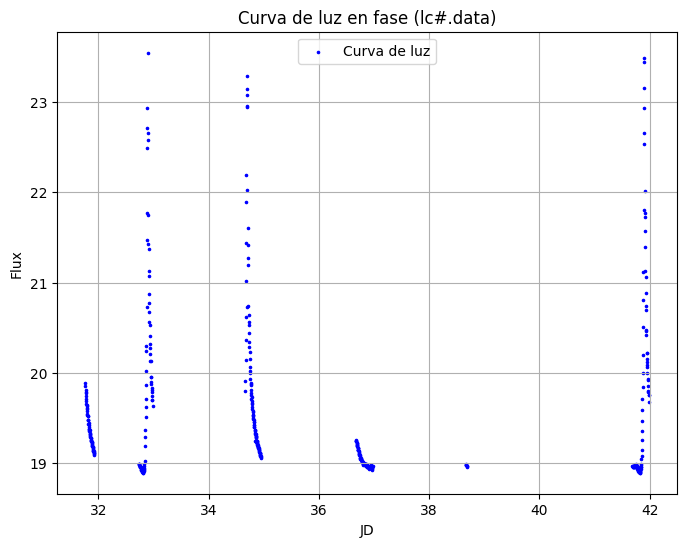

In [160]:
import matplotlib.pyplot as plt

# Generar la grafica
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['JD'], merged_df['MagInstr'], s=2.5, color='blue', label='Curva de luz')
plt.xlabel('JD')
plt.ylabel('Flux')
plt.title('Curva de luz en fase (lc#.data)')
plt.legend()
plt.grid()
plt.show()